In [4]:
#Lets start by Loading the data
import pandas as pd
train = pd.read_csv('D:/Knowledge/AV/train_gbW7HTd.csv')
test = pd.read_csv('D:/Knowledge/AV/test_2AFBew7.csv')

### Univariate Analysis

In [5]:
#Let's start by looking at the data type of each column
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

#### 1. Continuous Variables

In [9]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


#### 2. Categorical Variables

In [12]:
#Step1: Get a List of categorical variables:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
print(categorical_variables)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [15]:
#Step2: Use the apply function in python to determine the number of unique values in each column
train[categorical_variables].apply(lambda x: len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

#### 2.1 Analyzing Race

In [16]:
#Print the counts of each category:
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [18]:
#Print the percentage of observations in each category:
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

#### 2.2 Analyzing Native-Country

In [20]:
#Print the counts of each category:
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [21]:
#Print the percentage of observaions of each category:
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

### Multivariate Analysis

#### 1. Both Categorical

In [25]:
#Print the cross-tabulation
ct = pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


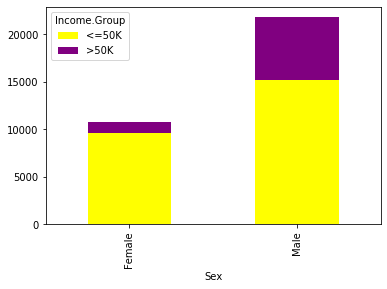

In [26]:
#We can also plot it using a stacked chart
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['yellow','purple'], grid=False)

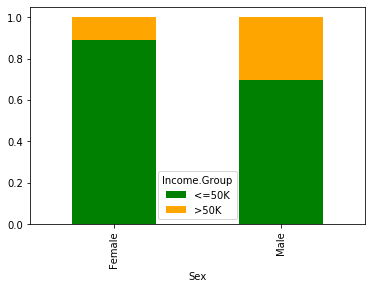

In [27]:
def percConvert(ser):
    return ser/float(ser[-1])
ct2 = ct.apply(percConvert, axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['green', 'orange'], grid=False)

#### 2. Both Continuous

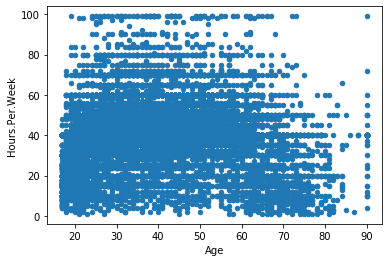

In [28]:
train.plot('Age', 'Hours.Per.Week', kind='scatter')

#### 3. Categorical-Continuous Combination

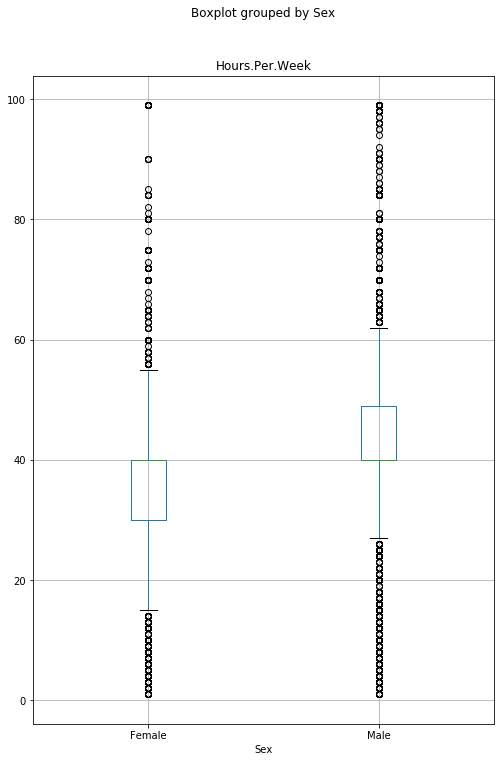

In [32]:
train.boxplot(column='Hours.Per.Week',by='Sex', figsize=(8,12))

### Missing Value Treatment

In [33]:
#Checking the missing values in training data:
train.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [34]:
#Checking the missing values in testing data:
test.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

In [37]:
#Since all of these are categorical, we can simply impute them with the mode values.

#Import function:
from scipy.stats import mode

#Try it out:
mode(train['Workclass']).mode[0]

E:\InstalledSoftwares\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Private'

In [40]:
#impute the values:
var_to_impute = ['Workclass', 'Occupation', 'Native.Country']
for var in var_to_impute:
    train[var].fillna(mode(train[var]).mode[0], inplace=True)
    test[var].fillna(mode(test[var]).mode[0], inplace=True)

In [41]:
#Now check the #missing values in train again to confirm:
train.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [42]:
#Now check the #missing values in test again to confirm:
test.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

### Outlier Treatment

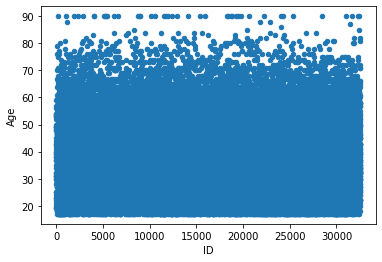

In [43]:
#Making a scatter plot for age:
%matplotlib inline
train.plot('ID', 'Age', kind='scatter')

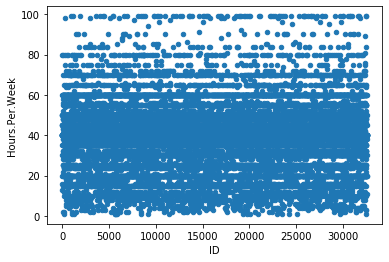

In [44]:
#Making a scatter plot for Hours.Per.Week:
%matplotlib inline
train.plot('ID', 'Hours.Per.Week', kind='scatter')

### Variable Transformation

In [45]:
#Check data types of available variables
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [47]:
#Determine the percentage of observations in each Workclass category
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [48]:
#To combine categories with very few observations. As a thumbrule, combine categories with <5% of the values.
categories_to_combine =['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']

In [49]:
#Run a Loop and replace all values with others
for cat in categories_to_combine:
    train['Workclass'].replace({cat:'Others'},inplace=True)
    test['Workclass'].replace({cat:'Others'},inplace=True)

In [50]:
#Check the new categories in train
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

Now lets repeat the above process for remaining columns. But we'll use a slightly sophisticated method here so that we can repeat the process quickly using a loop.

#### Step 1: Make a list of variables to combine

In [51]:
#Make list of categorical variables:
categorical_variables = categorical_variables[1:]

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [52]:
#Check the current number of unique values
train[categorical_variables].apply(lambda x: len(x.unique()))

Workclass          4
Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

#### Step2: Run a loop over these values and combine categories

In [54]:
for column in categorical_variables:
    #Determine the categories to combine:
    frq = train[column].value_counts()/train.shape[0]
    categories_to_combine = frq.loc[frq.values<0.05].index
    
    #Loop over all categories and combine them as others
    for cat in categories_to_combine:
        train[column].replace({cat:'Others'}, inplace=True)
        test[column].replace({cat:'Others'}, inplace=True)

In [55]:
#Check the result for train data
train[categorical_variables].apply(lambda x: len(x.unique()))

Workclass         4
Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

## Predictive Modelling

Since this is a classification problem, we can start with various models like logistic regression, naive bayes, decision trees, etc. Here we will run a decision tree model as an example.

For modeling using sklearn in Pandas, we have to adopt the following steps:

Data Preprocessing: sklearn accepts only numeric data so we've to convert text to numbers
Training model: fit the model on training data
Making predictions: use the model to make predictions on test data
Analyze results: compare the train and test accuracy and derive insights required to improve the model

#### Step 1: Data Preprocessing

In [56]:
from sklearn.preprocessing import LabelEncoder

In [58]:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [60]:
#Now we convert them using LabelEncoder:
le = LabelEncoder()
for var in categorical_variables:
    train[var] = le.fit_transform(train[var])
    test[var] = le.fit_transform(test[var])

KeyError: 'Income.Group'

In [63]:
train.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
Income.Group      int64
dtype: object

#### Step2: Fit the model

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
#Define the predictors which will be all variables except ID and target
dependent_variable ='Income.Group'
independent_variables = [x for x in train.columns if x not in ['ID', dependent_variable]]
print(independent_variables)

['Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country']


Now that we have the predictors, lets run the model with the following benchmark parameters:

max_depth = 10
min_samples_leaf = 100
max_features = 'sqrt'

In [69]:
#Initialize the algorithm
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 100, max_features = 'sqrt')

#Fit the algorithm:
model.fit(train[independent_variables], train[dependent_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Step3: Make predictions

In [70]:
predictions_train = model.predict(train[independent_variables])
predictions_test = model.predict(test[independent_variables])

#### Step4: Analyze results:

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
#Determine the train error:
acc_train = accuracy_score(train[dependent_variable],predictions_train)

In [73]:
print('Train Accuracy: %f'%acc_train)

Train Accuracy: 0.815331
